LETTURA DI TUTTI I NOMI DI IMMAGINI NELLA CARTELLA ./olivetti_PNG_master/images/

In [3]:
from PIL import Image
from numpy import asarray
import numpy as np
from scipy.stats import skew

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot

In [4]:
# funzione che calcola il decrittore specificato per l'immagine data in input
# parametri: 
    # imageID: nome del file dell'immagine
    # modelName: nome del descrittore che vogliamo calcolare

def ottieniDescrittore(imageID, modelName):
    # apriamo l'immagine
    image = Image.open('./olivetti_PNG_master/images/' + imageID)

    # convertiamo l'immagine in un numpy array
    data = asarray(image)
    print(data)

    arrayOf64LittleImages = getArrayOf64LittleImages(data)

    match modelName:
        case 'ColorMoments':
            return getColorMoments(arrayOf64LittleImages)
        case 'ELBP':
            return "Not found"
        case 'HOG':
            return "I'm a teapot"
        case _:
            return "Errore, inserire un descrittore corretto"

# funzione che calcola i color moments (mean, std e skewness) per l'immagine data in input
# parametri: 
    # arrayOf64LittleImages: array contenente 64 matrici (ogni matrice corrisponde ad una mattonella)

def getColorMoments(arrayOf64LittleImages):
        # print(arrayOf64LittleImages)

    arrayOfMeans = []  # array che contiene la media di ogni tassello
    arrayOfStd = []  # array che contiene la media di ogni tassello
    arrayOfSkewness = []  # array che contiene la media di ogni tassello
    
    # TODO: riguardare bene la skewness

    for i in range(0, len(arrayOf64LittleImages)):
        # print(arrayOf64LittleImages[i].mean())
        #print("Indice ", i)
        #print(arrayOf64LittleImages[i])
        # arrnp = np.asarray(arrayOf64LittleImages[i])
        # print("MEAN ", arrnp.mean())
        
        arrayOfMeans.append(arrayOf64LittleImages[i].mean())
        arrayOfStd.append(arrayOf64LittleImages[i].std())
        arrayOfSkewness.append(skew(skew(arrayOf64LittleImages[i])))    #TODO: ricontrollare bene come calcolare la skewness totale

    print("\nArray of means")
    print(arrayOfMeans)

    print("\nArray of Std")
    print(arrayOfStd)
    # print(arrayOfSkewness)

    print("\nArray of Skewness")
    print(arrayOfSkewness)

    numpyArrayOfMeans = np.array(arrayOfMeans)
    print("\nTotal mean of image: ", numpyArrayOfMeans.mean())

    numpyArrayOfStd = np.array(arrayOfStd)
    print("\nTotal std of image: ", numpyArrayOfStd.std())

    numpyArrayOfSkew = np.array(arrayOfSkewness)
    print("\nTotal skew of image: ", skew(numpyArrayOfSkew))
    
# funzione che divide l'immagine in input in 64 matrici più piccole (mattonelle)
# parametri: 
    # data: l'immagine in forma di numpy array (ovvero una matrice numerica in cui ogni valore indica il colore del pixel in scala di grigi)

def getArrayOf64LittleImages(data):
    # TODO: riguardare questa cosa di grey scale
    grey_levels = 256

    # Define the window size
    windowsize_r = 8
    windowsize_c = 8

    # questo array contiene tutte le matrici corrispondenti ai vari tasselli dell'immagine grande
    arrayOf64LittleImages = []
    #arr = np.array((0, 3))

    # Crop out the window and calculate the histogram
    for r in range(0, data.shape[0] - windowsize_r, windowsize_r):
        for c in range(0, data.shape[1] - windowsize_c, windowsize_c):
            window = data[r:r+windowsize_r, c:c+windowsize_c]

            window_np = np.asarray(window)
            hist = np.histogram(window, bins=grey_levels)

            # print(window_np)
            imagetest = Image.fromarray(window)
            # print(window.mean(axis=0))
            arrayOf64LittleImages.append(window)
            #arr = np.append(arr, window)
            # print(arr)
            # pyplot.imshow(imagetest, cmap='gray')
            # pyplot.show()

    return arrayOf64LittleImages


In [5]:
ottieniDescrittore('image-1.png', 'ColorMoments')

[[127 133 147 ...  34  32  32]
 [124 137 150 ...  42  41  41]
 [141 149 154 ...  38  39  39]
 ...
 [239 242 246 ...  17  17  17]
 [239 240 245 ...  15  15  15]
 [236 245 242 ...  20  20  20]]

Array of means
[192.46875, 213.15625, 225.765625, 234.21875, 217.8125, 210.40625, 197.703125, 209.328125, 191.890625, 160.328125, 186.125, 214.96875, 183.03125, 172.140625, 216.578125, 185.484375, 159.703125, 173.453125, 218.015625, 154.703125, 157.375, 222.0625, 212.59375, 209.390625, 206.21875, 209.4375, 193.34375, 186.671875, 235.4375, 229.21875, 208.75, 197.34375, 208.1875, 190.46875, 190.375, 236.296875, 237.984375, 208.890625, 183.96875, 167.46875, 192.4375, 141.96875, 218.0, 239.921875, 210.5, 195.828125, 173.203125, 179.984375, 65.640625]

Array of Std
[27.474970854170163, 4.880505705098602, 7.1539809448568565, 6.377373945245801, 3.427257467713799, 4.285581750182815, 10.872384293906052, 9.700281386865795, 30.471358061454612, 37.60072085724388, 28.901502988599052, 9.163393118135879, 35.644

(64, 64)


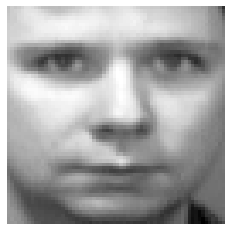

In [59]:
#importing required libraries
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# reading the image
img = imread('./olivetti_PNG_master/images/image-222.png', 0)
plt.axis("off")
plt.imshow(img, cmap='gray')
print(img.shape)

(128, 64)


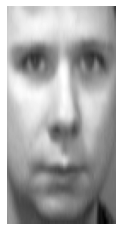

In [68]:
# resizing image
resized_img = resize(img, (128*1, 64*1))    #TODO: capire bene perchè qua su un tutorial scriveva 128 x 4 e 64 x 4
plt.axis("off")
plt.imshow(resized_img, cmap='gray')
print(resized_img.shape)

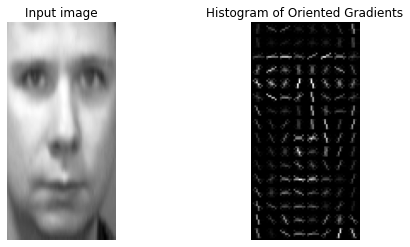

3780


In [71]:
#creating hog features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)

#fd è di lunghezz 3780

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(resized_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

print(len(fd))